## Naive Bayes

In [16]:
%%capture

import sys
!{sys.executable} -m pip install nbformat

%run -G ./dataProcess.ipynb

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

In [14]:
# import libraries 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import log_loss
from sklearn.metrics import recall_score
from sklearn.decomposition import PCA
#from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [22]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V20,Hour,Class
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.475312,0.510600,0.252484,0.680908,0.635591,0.434392,0.737173,0.655066,0.594863,0.582942,0.0,0
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.453981,0.505267,0.381188,0.744342,0.641219,0.464105,0.727794,0.640681,0.551930,0.579530,0.0,0
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.410603,0.513018,0.322422,0.706683,0.640473,0.357443,0.763381,0.644945,0.386683,0.585855,0.0,0
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.414999,0.507585,0.271817,0.710910,0.636372,0.415653,0.711253,0.788492,0.467058,0.578050,0.0,0
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.490950,0.524303,0.236355,0.724477,0.608406,0.434995,0.724243,0.650665,0.626060,0.584615,0.0,0


In [17]:
df["Hour"] = [(s // 3600) % 24 for s in df["Time"]]
#sns.displot(df, x='Hour', kind='kde')

In [18]:
X = df.drop('Class', axis=1)
y = df['Class']
cols = list(df.columns)
cols.remove('Class')
scaler = MinMaxScaler()

#scale independent variables, and then concat dependent variable to restore dataframe
df = pd.DataFrame(scaler.fit_transform(X), columns = cols)
df = pd.concat([df, y], axis=1)

In [19]:
df = df.drop(['Time', 'V13', 'V15', 'V22','V23','V24','V25','V26', 'V27','V28','Amount', 'V8', 'V21'], axis=1)

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

#we will oversample after train test split because we want to test the model on UNSEEN data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
smote = SMOTE(random_state=21)

X_train, y_train = smote.fit_resample(X, y)

### imbl does not work, so i trained the model without the resample part

In [20]:
# Splitting into training and testing with the ratio of 80:20
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=21)
print(train.shape, test.shape)

# create X_train, y_train, X_test and y_test
X_train, y_train = train.copy().drop(columns=['Class']), train['Class']
X_test, y_test = test.copy().drop(columns=['Class']), test['Class']


(226980, 19) (56746, 19)


In [29]:
# naive bayes model
nb = GaussianNB()

scaler.fit(X_train)
nb.fit(X_train, np.asarray(y_train))

yhat = nb.predict(X_test)

### Model evaluation - classification report and confusion matrices

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    226599
           1       0.09      0.87      0.17       381

    accuracy                           0.99    226980
   macro avg       0.55      0.93      0.58    226980
weighted avg       1.00      0.99      0.99    226980



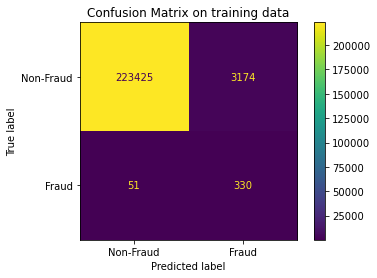

In [30]:
# train data
print(classification_report(y_train, nb.predict(scaler.transform(X_train))))

cm = confusion_matrix(y_train, nb.predict(X_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Fraud', 'Fraud'])
disp.plot()
plt.title('Confusion Matrix on training data')
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56654
           1       0.07      0.75      0.14        92

    accuracy                           0.98     56746
   macro avg       0.54      0.87      0.56     56746
weighted avg       1.00      0.98      0.99     56746



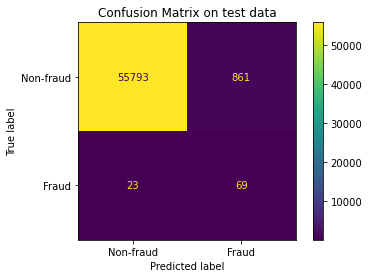

In [31]:
# test data
print(classification_report(y_test, nb.predict(scaler.transform(X_test))))

cm = confusion_matrix(y_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-fraud', 'Fraud'])
disp.plot()
plt.title('Confusion Matrix on test data')
plt.show()

### Conclusion

The model

Comparing this naive bayesian model to our previos models (logistic and k-nearest-neighbour), this model has the lowest **recall** score. The model is therefore less suitied for predicting credit card fraud. On the other hand, the precision is a little higher than the logistic model(0.04), but a lot less than for knn (0.26). This could be because has lower variance whereas logostic regression has lower bias. 